In [1]:
import os
os.chdir("/Users/sanjanakotha/Desktop/Staller_Lab/consensus_predictor/notebooks")

import pandas as pd
import seaborn as sns
sns.set_context('talk')
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



# 1. 40-mers

## 1A. PADI

In [2]:
padi = pd.read_excel("../data/41586_2024_7707_MOESM2_ESM.xlsx")
padi = padi[["Fragment Sequence", "PADI Score"]]
padi = padi.rename(columns = {"Fragment Sequence" : "seq", "PADI Score": "score"})
padi["screen"] = "padi"
padi["seq"] = padi["seq"].str.strip().str.upper()
padi = padi.drop_duplicates(subset = "seq")
padi

,seq,score,screen
0,MEDQVGFGFRPNDEELVGHYLRNKIEGNTSRDVEVAISEV,1.004699,padi
1,PNDEELVGHYLRNKIEGNTSRDVEVAISEVNICSYDPWNL,0.575876,padi
2,LRNKIEGNTSRDVEVAISEVNICSYDPWNLRFQSKYKSRD,-0.300407,padi
3,RDVEVAISEVNICSYDPWNLRFQSKYKSRDAMWYFFSRRE,0.105372,padi
4,NICSYDPWNLRFQSKYKSRDAMWYFFSRRENNKGNRQSRT,-0.167147,padi
...,...,...,...
69568,SDFVVKAEDVEASMAIFWTPGTRVKMAMETEDSSRITWFQ,-0.139281,padi
69569,EASMAIFWTPGTRVKMAMETEDSSRITWFQGIVFYTYQET,-0.064551,padi
69570,GTRVKMAMETEDSSRITWFQGIVFYTYQETGPWRGSPWNS,-0.410777,padi
69571,EDSSRITWFQGIVFYTYQETGPWRGSPWNSFRYKIPFTIP,0.329820,padi


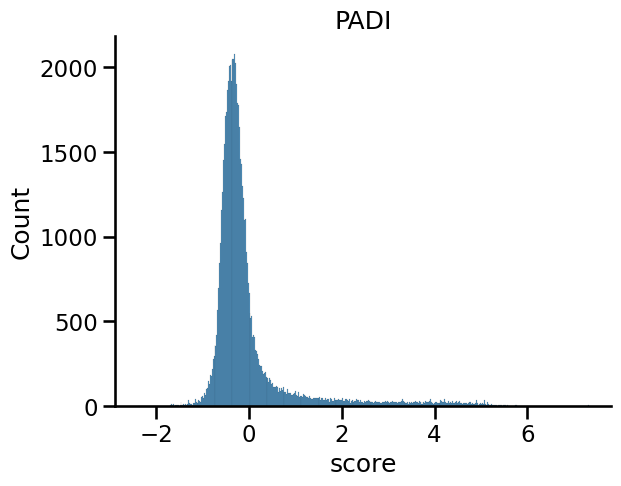

In [3]:
sns.histplot(data = padi, x = "score")
sns.despine()
plt.title("PADI");

## 1B. GCN4

In [4]:
gcn4 = pd.read_csv("../data/Table_S5_Tile_Activities_Properties_Dataframe.csv")
gcn4.columns

Index(['ADseq', 'Name', 'ArrayDNA', 'Activity_BioRepA_BYS4',
       'Activity_BioRepB_BYS4', 'TotalReads_BioRepA_BYS4',
       'TotalReads_BioRepB_BYS4', 'BioRep_A_GFP_TotalReads', 'BioRep_A_GFP',
       'BioRep_B_GFP_TotalReads', 'BioRep_B_GFP',
       'BioRep_A_mCherry_TotalReads', 'BioRep_A_mCherry',
       'BioRep_B_mCherry_TotalReads', 'BioRep_B_mCherry',
       'Activity_BYS4_BioRepAverage', 'Stdev_BYS4_BioReps',
       'Activity_SCglucose', 'Start', 'Recovered', 'Charge',
       'HydrophobicityKD', 'HydrophobicityWW', 'Kappa', 'Omega', 'OmegaWFY_DE',
       'OmegaWFYL_DE', 'OmegaWF_D', 'Disorder', 'A', 'C', 'D', 'E', 'F', 'G',
       'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y',
       'Aromatics', 'WFYL', 'W..LF', '[WFYL]..[WFYL][WFYL]',
       '[WFL]..[WFL][WFL]', '[DE][WFY]', '[DE][WF]', '[DE][L]', '[DE].[WFY]',
       '[DE]..[WFY]', 'FF', 'F.F', 'F..F', '[FY].....[FY]DF', 'D.F', 'D..F',
       'FD', 'F.D', 'F..D', 'MF.Y..L', 'M..Y..L', 'SP',
       '[

In [5]:
gcn4 = gcn4[["ADseq", "Activity_SCglucose"]]
gcn4 = gcn4.rename(columns = {"ADseq" : "seq", "Activity_SCglucose": "score"})
gcn4["seq"] = gcn4["seq"].str.strip().str.upper()
gcn4["screen"] = "gcn4"
gcn4 = gcn4.drop_duplicates(subset = "seq")
gcn4

,seq,score,screen
0,MALRIEVYNRIESSTASTALQRQDLRYTFRSNARAASGQA,50849.75654,gcn4
1,EVYNRIESSTASTALQRQDLRYTFRSNARAASGQANANYQ,22153.46439,gcn4
2,IESSTASTALQRQDLRYTFRSNARAASGQANANYQAFTAG,25911.89042,gcn4
3,ASTALQRQDLRYTFRSNARAASGQANANYQAFTAGSALNG,22446.77365,gcn4
4,QRQDLRYTFRSNARAASGQANANYQAFTAGSALNGPSLPA,51501.39821,gcn4
...,...,...,...
20726,AKVDTEEEDKTMVDSTSLSWEDLFDFESYSTDLIASINPD,261829.75160,gcn4
20727,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR,261410.70530,gcn4
20728,MTDSTPMFEYELTENNSKEWTSLFDTDIPVTTDDESLADK,152798.87030,gcn4
20729,STDSTPMFEYQNLENNSKEWTSLFDNDIPVTTDNVSLADK,113197.55830,gcn4


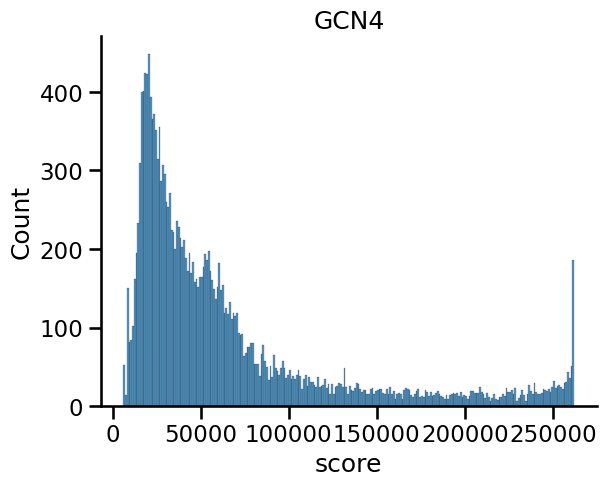

In [6]:
sns.histplot(gcn4["score"], binwidth = 1000)
sns.despine()
plt.title("GCN4");

## 1C. Sog1

In [7]:
sog1_sort3 = pd.read_csv("../data/SK_recalc_scores.csv")
sog1_sort3 = sog1_sort3.rename(columns = {"ProteinSeq" : "seq", "Activity_S3_1" : "score"})
sog1_sort3 = sog1_sort3[["seq", "score"]]
sog1_sort3["seq"] = sog1_sort3["seq"].str.strip().str.upper()
sog1_sort3["screen"] = "sog1_sort3"
sog1_sort3 = sog1_sort3.drop_duplicates(subset = "seq")
sog1_sort3

,seq,score,screen
0,AAAAAAAAAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGS,247.596326,sog1_sort3
1,AAAAAAAACQKIVLDPSNIELDTPPEFRLSQLEFGSQDSF,2420.236680,sog1_sort3
2,AAAAAAAAGEEDPTWFDSGSQFILNSQQLVEALSLCDDLL,544.103037,sog1_sort3
3,AAAAAAAANIELDTPPEFRLSQLEFGSQDSFLAWGTGKTD,391.240450,sog1_sort3
4,AAAAAHLGPEDFKRDLEECQAAAADPSNIELDTPPEFRLS,428.387407,sog1_sort3
...,...,...,...
6788,YSLFDDPSEGYETDPLFNTNDDLDDSNGWYSLFPPTTTSS,1627.763143,sog1_sort3
6789,YSLFDSPSEGYETDPLFNTNDDLDDSNGWYSLFPPTTTSS,3249.679912,sog1_sort3
6790,YSTGTRKRRKIHDDDFGDVRWHKTGRTKPVVLDGVQRGCK,1304.650547,sog1_sort3
6791,YSTGTRKRRKILDDDLGDVRWHKTGRTKPVILDGVQRGCK,2263.458216,sog1_sort3


In [8]:
sog1_sort2 = pd.read_csv("../data/Sog1_library1_sort2.csv")
sog1_sort2 = sog1_sort2.rename(columns = {"AAseq" : "seq"})
sog1_sort2["seq"] = sog1_sort2["seq"].str.strip().str.upper()
sog1_sort2["screen"] = "sog1_sort2"
sog1_sort2 = sog1_sort2.drop_duplicates(subset = "seq")
sog1_sort2

,seq,Activity_GFP8,Activity_ratio2,screen
0,EDPTWFDSGSQFILNSQQLVEALSLCDDAAGSQDREENTN,636.156202,37675.082479,sog1_sort2
1,EALSLCDDLLGDQDREENDNDGDLKDKQPCIADYAHLGPE,602.696194,41200.368672,sog1_sort2
2,DLAEDDEVMCMEDEVQSIQPNHERPDDGPELEHGLENGAK,381.502348,30737.744889,sog1_sort2
3,GQRKRRKITPTLVNDEPVRWHKTGRTKPVMLSGVQRGCKK,347.155741,50192.512730,sog1_sort2
4,SELTSTLGISHRLPQSLTPCVKTGSLQSGGLVQSVPFEEL,437.694050,60000.227476,sog1_sort2
...,...,...,...,...
1107,HFNPHTDYFYTFDEYLLSTPPAIFPDLKLTSQEASEVMRS,4444.689683,174246.501323,sog1_sort2
1108,EDPTWFDSGDQFILNDQQLVEALSLCDDLLGSQDREENTN,7960.852191,243705.211234,sog1_sort2
1109,EDPTWFDSGDQAIANDQQLVEALSLCDDLLGDQDREENTN,2769.615372,112896.558185,sog1_sort2
1110,EDPTADAAIQQLWNQGFLFVESLSLCDDLLGAQDREENTN,5603.789064,230752.268974,sog1_sort2


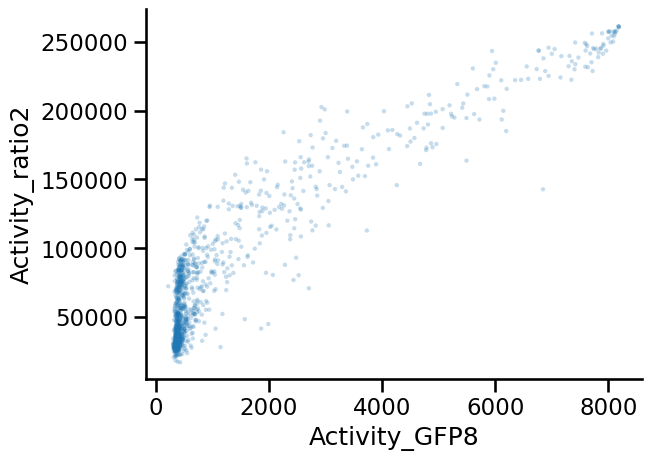

In [9]:
sns.scatterplot(data = sog1_sort2, x = "Activity_GFP8", y = "Activity_ratio2", alpha = 0.25, s = 10, edgecolor = 'none')
sns.despine()

In [10]:
sog1_sort2ratio = sog1_sort2.rename(columns = {"Activity_ratio2" : "score"})
sog1_sort2ratio = sog1_sort2ratio[["seq", "score"]]
sog1_sort2ratio

,seq,score
0,EDPTWFDSGSQFILNSQQLVEALSLCDDAAGSQDREENTN,37675.082479
1,EALSLCDDLLGDQDREENDNDGDLKDKQPCIADYAHLGPE,41200.368672
2,DLAEDDEVMCMEDEVQSIQPNHERPDDGPELEHGLENGAK,30737.744889
3,GQRKRRKITPTLVNDEPVRWHKTGRTKPVMLSGVQRGCKK,50192.512730
4,SELTSTLGISHRLPQSLTPCVKTGSLQSGGLVQSVPFEEL,60000.227476
...,...,...
1107,HFNPHTDYFYTFDEYLLSTPPAIFPDLKLTSQEASEVMRS,174246.501323
1108,EDPTWFDSGDQFILNDQQLVEALSLCDDLLGSQDREENTN,243705.211234
1109,EDPTWFDSGDQAIANDQQLVEALSLCDDLLGDQDREENTN,112896.558185
1110,EDPTADAAIQQLWNQGFLFVESLSLCDDLLGAQDREENTN,230752.268974


Text(0.5, 0, 'Ratio')

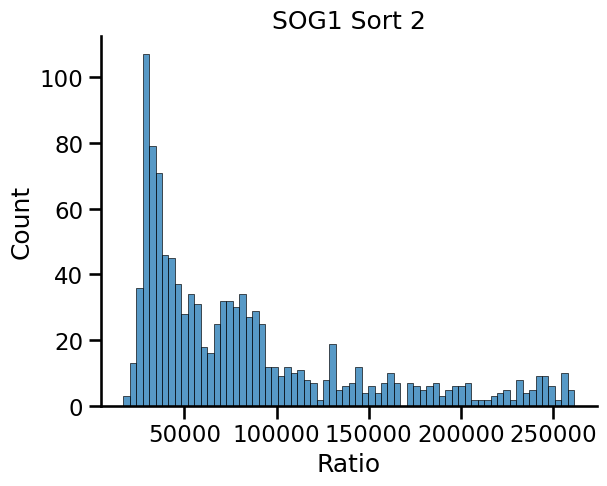

In [11]:
sns.histplot(sog1_sort2ratio["score"], bins = 70)
sns.despine()
plt.title("SOG1 Sort 2");
plt.xlabel("Ratio")

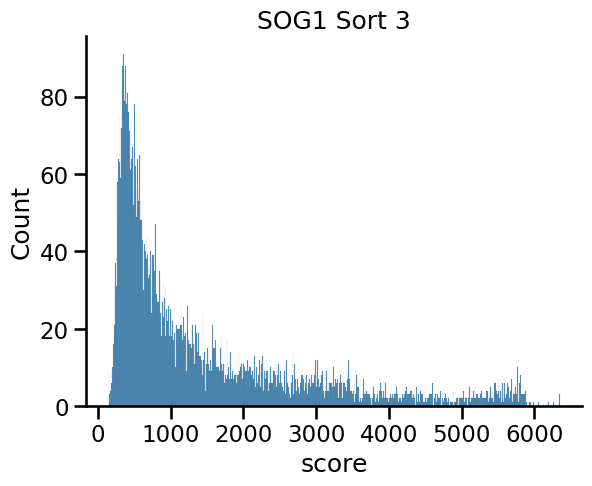

In [12]:
sns.histplot(sog1_sort3["score"], binwidth = 10)
sns.despine()
plt.title("SOG1 Sort 3");

## 1D. Controls library

In [13]:
controls = pd.read_csv("../data/Controls_Library_Sorted_with_SynADs.csv")
controls = controls.rename(columns = {"AAseq" : "seq", "SimpleAverage" : "score"})
controls = controls[["seq", "score"]]
controls["seq"] = controls["seq"].str.strip().str.upper()
controls["screen"] = "controls"
controls = controls.drop_duplicates(subset = "seq")
controls

,seq,score,screen
0,AAEPNYGSVAISLPLERTISSQSMERSGSSSSGSPVVLDG,5639.517210,controls
1,AAIALSQPETIPAKEISVPPSPAVGKSASPAPSPAPSKSG,4815.867766,controls
2,AAIPENELLDEDTMNAISSLKNDLSNISNSLPAEAPHEIA,15854.361910,controls
3,AALDVALALSQPETKPAKEVSVPPSPAIRNSASPAPSPAP,5231.704055,controls
4,AAVVESFFSSSADSTPMFEYENLEDNSKEWTSLFDNDIPV,239156.047600,controls
...,...,...,...
492,YKMQQEQNMKTFDPEVAFEEWFLSTDYQGLPSDFSPLTGV,248346.156300,controls
493,YPSTPHPQPRLRVPVKATHRPSALQPFLAQNNPRRHSFNL,6427.793208,controls
494,YRSQSVSTQRRSATSGVRKRQPLPPIVVEDPSDTVAMKRA,6050.175447,controls
495,YSLFDSPSEGYETSPLFNTNDDLDDSNGWYSLFPPTTTSS,202363.268900,controls


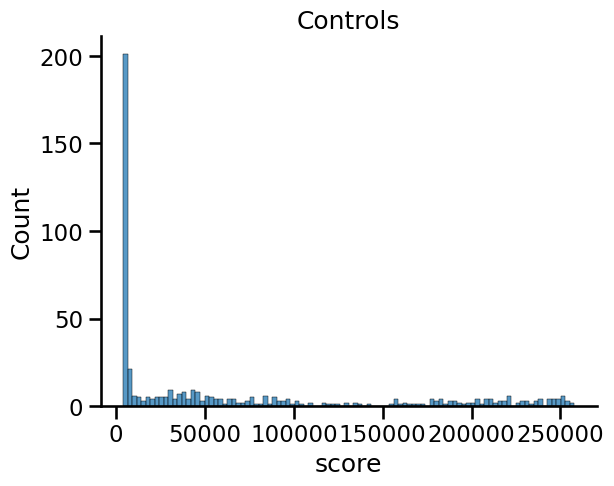

In [14]:
sns.histplot(controls["score"], bins = 100)
sns.despine()
plt.title("Controls");

## 1E. Synthetics

In [15]:
# Threshold = 0.057436713684575334 for std
# 19,530 for activity
controls_syn = pd.read_csv("../data/SynAD_Glu_Filtered_ActivityCtrlStd_replicateactivities_simpleave.csv")
# sns.scatterplot(data = controls_syn, x = "Activity", y = "StdActivity")
# plt.axhline(0.05)
controls_syn = controls_syn.rename(columns = {"AAseq" : "seq", "Activity" : "score"})
controls_syn = controls_syn[["seq", "score"]]
controls_syn["seq"] = controls_syn["seq"].str.strip().str.upper()
controls_syn["screen"] = "controls_syn"
controls_syn = controls_syn.drop_duplicates(subset = "seq")
controls_syn

,seq,score,screen
0,AAAAAIACELRTDNYFEYPDLSILDALDNDSDETMSLIDE,25075.335066,controls_syn
1,AAAAASDHSDVNDIIELGGLSNRLYDFYSDLEDIENDIAV,42429.450978,controls_syn
2,AAADGASFSDDTDEDLYKYDPWDLPGLSVIKTDDPEWFFF,167550.966119,controls_syn
3,AAADGASFSDDTDEDLYKYDPWELPSKASFGEQEWYFFSP,109426.029848,controls_syn
4,AAADGPDCDTREFCELRDSLLWNESCFLLDDDKRFDVSEN,56143.316707,controls_syn
...,...,...,...
17265,YYSDDIMLDLGVDLSNFQFDFRYFGLDSPLSPPWNEDDDS,254716.006477,controls_syn
17266,YYSEQSCYLDLDLDLDITFLDFSQFLEQLLQSKNDPLVSE,237618.847801,controls_syn
17267,YYSEQSCYLNFPPLDCVDLVATLSEKFKSFSQLLLDFPIS,46055.201492,controls_syn
17268,YYSEQSCYLNFPPLDMFPALPSDLSGWVESMLSELNNPAS,141711.824042,controls_syn


<Axes: xlabel='score', ylabel='Count'>

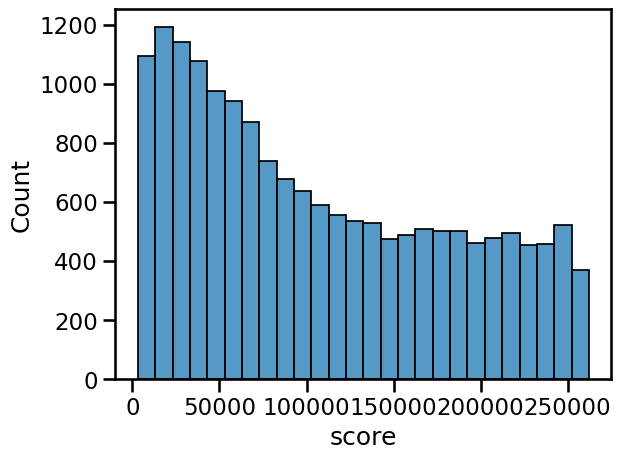

In [16]:
sns.histplot(data = controls_syn, x = "score")

# 1F. Scores from Lucas

In [44]:
from itertools import combinations

padi
gcn4
sog1_sort2ratio
controls_syn
# Create a dictionary of datasets
datasets = {"padi": padi, "gcn4": gcn4, "sog1_sort2ratio": sog1_sort2ratio, "controls_syn": controls_syn}

# Generate all combinations of 2 datasets
combos = combinations(datasets.keys(), 2)

# Find overlaps for each combination
overlaps = {}
for combo in combos:
    set1, set2 = combo
    overlap = pd.merge(datasets[set1], datasets[set2], on="seq", suffixes=(f"_{set1}", f"_{set2}"))
    overlaps[combo] = overlap

# Display overlaps as a formatted table with separate columns for combinations
overlap_table = pd.DataFrame([
    {"Dataset 1": combo[0], "Dataset 2": combo[1], "Overlap Count": len(overlap)}
    for combo, overlap in overlaps.items()
])

# Set a multi-index on the overlap table using 'Dataset 1' and 'Dataset 2'
overlap_table = overlap_table.set_index(["Dataset 1", "Dataset 2"])

# Display the table
display(overlap_table)

Overlap Count
Dataset 1       Dataset 2                     
padi            gcn4                         0
                sog1_sort2ratio            111
                controls_syn                 0
gcn4            sog1_sort2ratio             10
                controls_syn               482
sog1_sort2ratio controls_syn                 7

# 2. Merging GCN4 and controls_syn

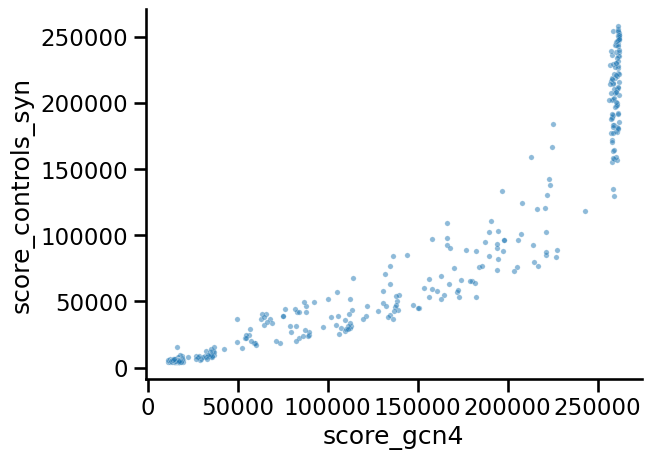

In [19]:
gcn4_controls_syn = pd.merge(gcn4, controls_syn, on = "seq", suffixes = ("_gcn4", "_controls_syn")).dropna()
sns.scatterplot(data = gcn4_controls_syn, x = "score_gcn4", y = "score_controls_syn", s = 15, alpha = 0.5)
sns.despine()

In [323]:
# Ensure no test data is saved by setting test_size to 0 in train_test_split
def fit_linear_reg(df, x, y):
    # Clean the dataframe by dropping NaN values
    df_cleaned = df.dropna()

    X = df_cleaned[[x]]  # Independent variable(s)
    y = df_cleaned[y]    # Dependent variable

    # Fit linear regression without splitting into train/test
    model = LinearRegression()
    model.fit(X, y)

    # Predict
    y_pred = model.predict(X)

    # Evaluate
    r2 = r2_score(y, y_pred)

    return model, r2

def plot_linear_reg(df, x, y, ax, lw = 3, alpha = 0.5, fontsize = 'x-small', font = 'monospace', fontweight = 'regular'):
    # Fit the linear regression model
    model, r2 = fit_linear_reg(df=df, x=x, y=y)
    
    # Add R^2 and equation to the plot
    ax.text(0.95, 0.05, f"R² = {r2:.2f}\ny = {model.intercept_:.1f} + {model.coef_[0]:.2f}x", 
            transform=ax.transAxes, fontsize=fontsize, verticalalignment='bottom', 
            color=sns.color_palette('colorblind')[1], ha='right', font= font, fontweight = fontweight)

    # Create linspace for smooth regression line
    x_min, x_max = df[x].min(), df[x].max()
    x_range = np.linspace(x_min, x_max, 100).reshape(-1, 1)  # 100 points evenly spaced
    y_fit = model.predict(x_range)

    # Plot the regression line
    ax.plot(x_range, y_fit, color=sns.color_palette('colorblind')[1], lw=lw, alpha=alpha)


In [324]:

def fit_log_reg(df, x, y):
    # Drop NaNs and filter out non-positive x values (log is undefined for x <= 0)
    df_cleaned = df.dropna()
    df_cleaned = df_cleaned[df_cleaned[x] > 0]

    X = np.log(df_cleaned[[x]]) # Take the natural log of x
    y_vals = df_cleaned[y]

    # Split into train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y_vals, test_size=0.2, random_state=42)

    # Fit linear regression on log-transformed x
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X)
    r2 = r2_score(y_vals, y_pred)
    
    return model, r2

def plot_log_reg(df, x, y, ax):
    # Fit the logarithmic regression model
    model, r2 = fit_log_reg(df, x, y)

    # Create range of x values for smooth curve, avoiding x <= 0
    x_vals = df[df[x] > 0][x]
    x_min, x_max = x_vals.min(), x_vals.max()
    x_range = np.linspace(x_min, x_max, 100).reshape(-1, 1)
    y_fit = model.predict(np.log(x_range))

    # Plot the regression curve
    ax.plot(x_range, y_fit, color=sns.color_palette('colorblind')[1], lw=3, alpha=0.5)

    # Annotate R^2 and equation
    intercept = model.intercept_
    coef = model.coef_[0]
    eqn = f"y = {intercept:.2f} + {coef:.2f}·ln(x)"
    ax.text(0.95, 0.05, f"R² = {r2:.2f}\n{eqn}", 
            transform=ax.transAxes, fontsize='x-small', verticalalignment='bottom', 
            color=sns.color_palette('colorblind')[1], ha='right', font='monospace')

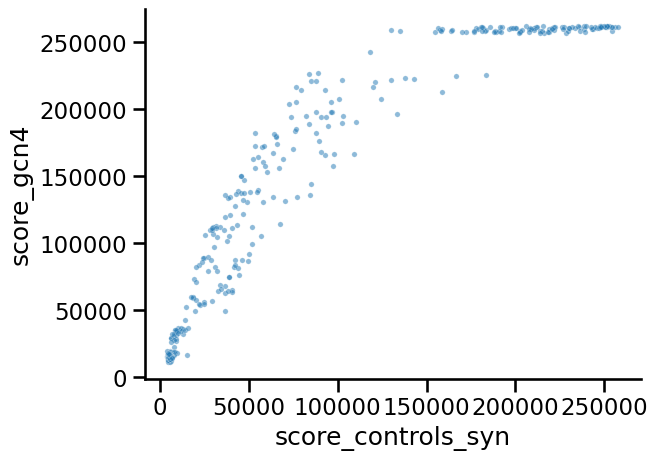

In [325]:
ax = sns.scatterplot(data=gcn4_controls_syn, x="score_controls_syn", y="score_gcn4", s=15, alpha=0.5)
sns.despine()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


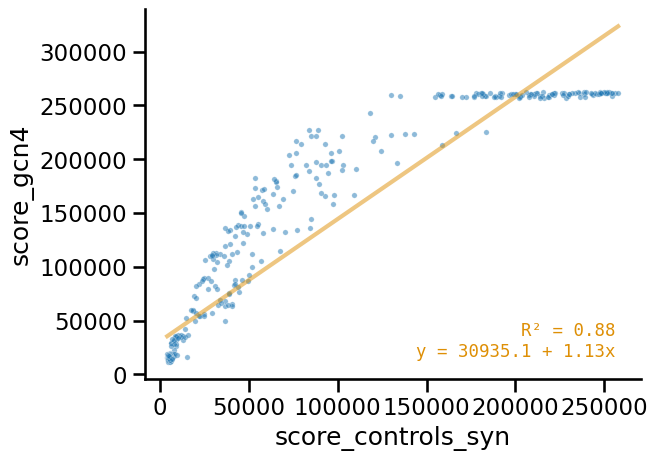

In [326]:
ax = sns.scatterplot(data=gcn4_controls_syn, x="score_controls_syn", y="score_gcn4", s=15, alpha=0.5)
plot_linear_reg(gcn4_controls_syn, x="score_controls_syn", y="score_gcn4", ax=ax)
sns.despine()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


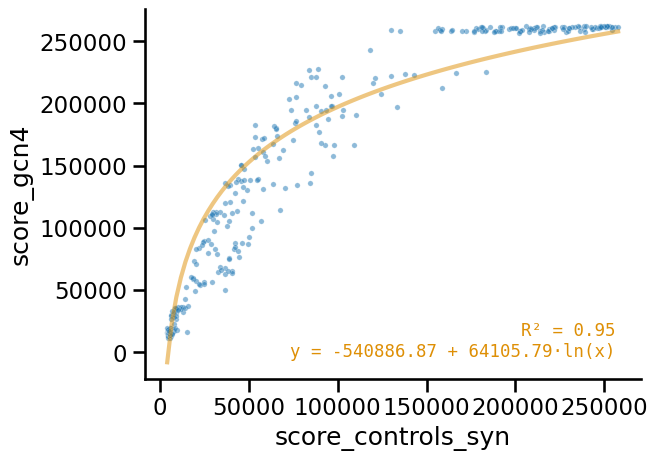

In [321]:
ax = sns.scatterplot(data=gcn4_controls_syn, x="score_controls_syn", y="score_gcn4", s=15, alpha=0.5)
plot_log_reg(gcn4_controls_syn, x="score_controls_syn", y="score_gcn4", ax=ax)
sns.despine()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


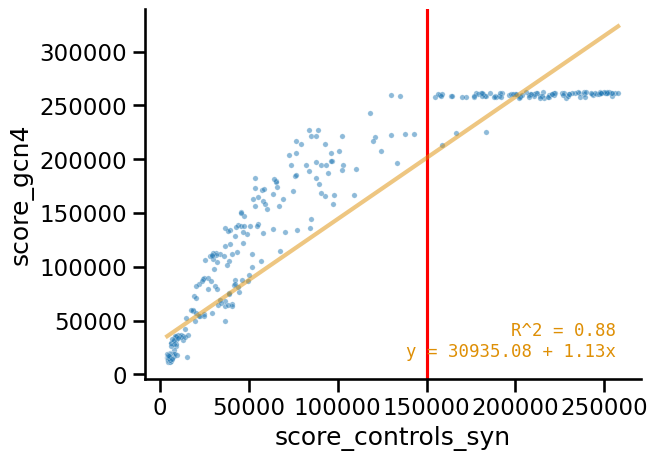

In [165]:
ax = sns.scatterplot(data=gcn4_controls_syn, x="score_controls_syn", y="score_gcn4", s=15, alpha=0.5)
plt.axvline(150000, color = 'red')
plot_linear_reg(gcn4_controls_syn, x="score_controls_syn", y="score_gcn4", ax=ax)
sns.despine()

In [166]:
np.percentile(gcn4_controls_syn["score_controls_syn"], 25)

5466.141761322728

In [167]:
np.percentile(gcn4_controls_syn["score_controls_syn"], 75)

95680.59345299573

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


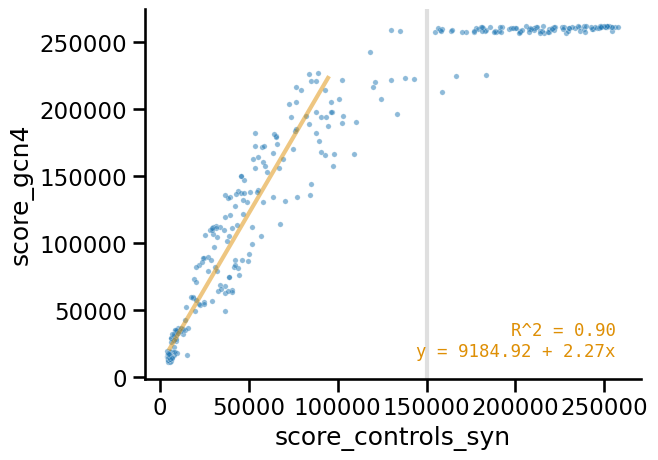

In [168]:
ax = sns.scatterplot(data=gcn4_controls_syn, x="score_controls_syn", y="score_gcn4", s=15, alpha=0.5)
plt.axvline(150000, color = 'gray', alpha = 0.25, lw = 3)
plot_linear_reg(gcn4_controls_syn[(gcn4_controls_syn["score_controls_syn"] < 95680.59345299573) & (gcn4_controls_syn["score_controls_syn"] > 5466.141761322728)], x="score_controls_syn", y="score_gcn4", ax=ax)
sns.despine()

## 2A. Exclude saturated parts

In [230]:
max(gcn4_controls_syn["score_gcn4"])

262015.3202

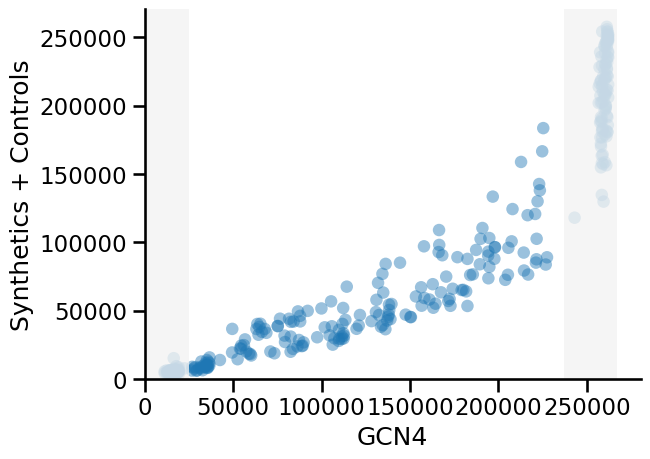

In [272]:
ax = sns.scatterplot(data=gcn4_controls_syn, y="score_controls_syn", x="score_gcn4", alpha=0.45, edgecolor='none')

lower_lim = 25000
upper_lim = max(gcn4_controls_syn["score_gcn4"]) - lower_lim

ax.axvspan(0, lower_lim, color='white', alpha=0.75, lw=0)
ax.axvspan(0, lower_lim, color='silver', alpha=0.15, lw=0)

ax.axvspan(upper_lim, max(gcn4_controls_syn["score_gcn4"]) + 5000, color='white', alpha=0.75, lw=0)
ax.axvspan(upper_lim, max(gcn4_controls_syn["score_gcn4"]) + 5000, color='silver', alpha=0.15, lw=0)

ax.set_xlim(0, None)
ax.set_ylim(0, None)

ax.set_xlabel("GCN4")
ax.set_ylabel("Synthetics + Controls")

sns.despine()



/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


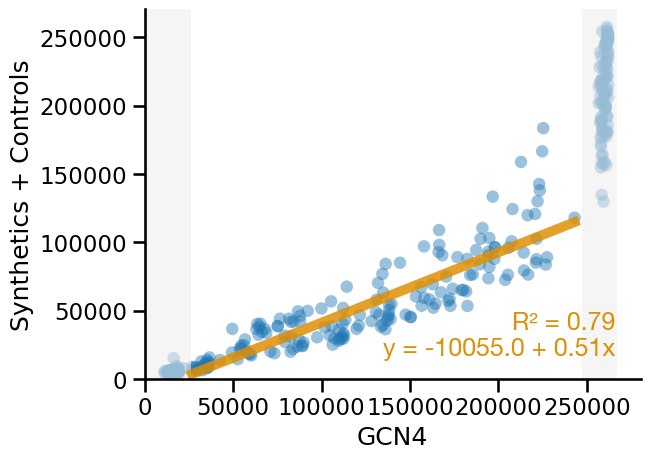

In [ ]:
fig, ax = plt.subplots( dpi = 100)
sns.scatterplot(data=gcn4_controls_syn, y="score_controls_syn", x="score_gcn4", alpha=0.45, edgecolor='none', ax = ax)

lim_width = 15000
lower_lim = min(gcn4_controls_syn["score_gcn4"]) + lim_width
upper_lim = max(gcn4_controls_syn["score_gcn4"]) - lim_width

ax.axvspan(0, lower_lim, color='white', alpha=0.5, lw=0)
ax.axvspan(0, lower_lim, color='silver', alpha=0.15, lw=0)

ax.axvspan(upper_lim, max(gcn4_controls_syn["score_gcn4"]) + 5000, color='white', alpha=0.5, lw=0)
ax.axvspan(upper_lim, max(gcn4_controls_syn["score_gcn4"]) + 5000, color='silver', alpha=0.15, lw=0)

ax.set_xlim(0, None)
ax.set_ylim(0, None)

ax.set_xlabel("GCN4")
ax.set_ylabel("Synthetics + Controls")

filtered_scores = gcn4_controls_syn[(gcn4_controls_syn["score_gcn4"] < upper_lim) & (gcn4_controls_syn["score_gcn4"] > lower_lim)]
plot_linear_reg(filtered_scores, x="score_gcn4", y="score_controls_syn", ax=ax, lw=7, alpha=0.85, fontsize='medium', font='Helvetica Neue', fontweight='bold')

sns.despine()



# 2. Synthetics vs Synthetics + controls

In [342]:
controls

,seq,score,screen
0,AAEPNYGSVAISLPLERTISSQSMERSGSSSSGSPVVLDG,5639.517210,controls
1,AAIALSQPETIPAKEISVPPSPAVGKSASPAPSPAPSKSG,4815.867766,controls
2,AAIPENELLDEDTMNAISSLKNDLSNISNSLPAEAPHEIA,15854.361910,controls
3,AALDVALALSQPETKPAKEVSVPPSPAIRNSASPAPSPAP,5231.704055,controls
4,AAVVESFFSSSADSTPMFEYENLEDNSKEWTSLFDNDIPV,239156.047600,controls
...,...,...,...
492,YKMQQEQNMKTFDPEVAFEEWFLSTDYQGLPSDFSPLTGV,248346.156300,controls
493,YPSTPHPQPRLRVPVKATHRPSALQPFLAQNNPRRHSFNL,6427.793208,controls
494,YRSQSVSTQRRSATSGVRKRQPLPPIVVEDPSDTVAMKRA,6050.175447,controls
495,YSLFDSPSEGYETSPLFNTNDDLDDSNGWYSLFPPTTTSS,202363.268900,controls


In [343]:
controls_syn

,seq,score,screen
0,AAAAAIACELRTDNYFEYPDLSILDALDNDSDETMSLIDE,25075.335066,controls_syn
1,AAAAASDHSDVNDIIELGGLSNRLYDFYSDLEDIENDIAV,42429.450978,controls_syn
2,AAADGASFSDDTDEDLYKYDPWDLPGLSVIKTDDPEWFFF,167550.966119,controls_syn
3,AAADGASFSDDTDEDLYKYDPWELPSKASFGEQEWYFFSP,109426.029848,controls_syn
4,AAADGPDCDTREFCELRDSLLWNESCFLLDDDKRFDVSEN,56143.316707,controls_syn
...,...,...,...
17265,YYSDDIMLDLGVDLSNFQFDFRYFGLDSPLSPPWNEDDDS,254716.006477,controls_syn
17266,YYSEQSCYLDLDLDLDITFLDFSQFLEQLLQSKNDPLVSE,237618.847801,controls_syn
17267,YYSEQSCYLNFPPLDCVDLVATLSEKFKSFSQLLLDFPIS,46055.201492,controls_syn
17268,YYSEQSCYLNFPPLDMFPALPSDLSGWVESMLSELNNPAS,141711.824042,controls_syn


<Axes: xlabel='score_controls', ylabel='score_controls_syn'>

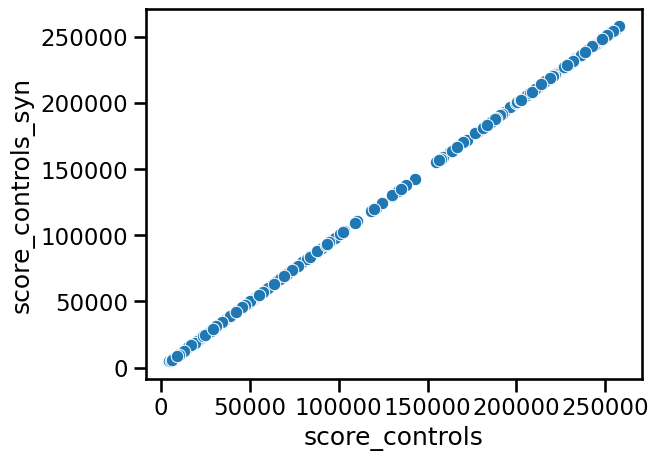

In [353]:
controls_merged = pd.merge(controls, controls_syn, suffixes = ("_controls", "_controls_syn"), on = "seq")
sns.scatterplot(data = controls_merged, x = "score_controls", y = "score_controls_syn")

In [ ]:
# 3. 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


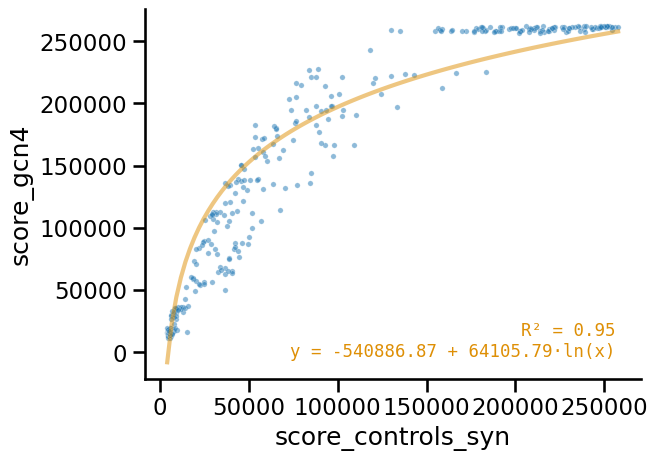

In [71]:
ax = sns.scatterplot(data=gcn4_controls_syn, x="score_controls_syn", y="score_gcn4", s=15, alpha=0.5)
plot_log_reg(gcn4_controls_syn, x="score_controls_syn", y="score_gcn4", ax=ax)
sns.despine()

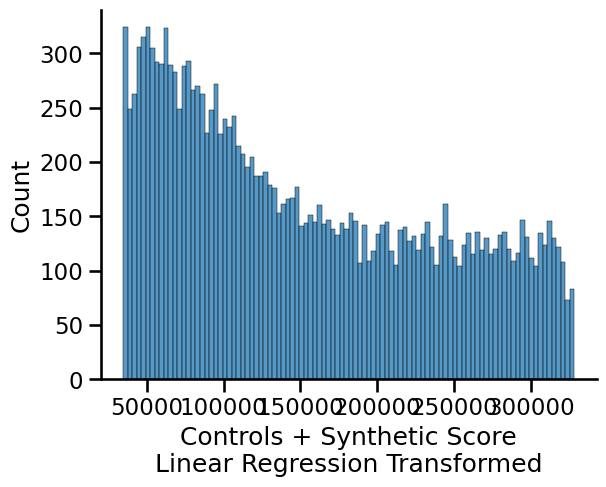

In [135]:
model, r2 = fit_linear_reg(gcn4_controls_syn, y="score_gcn4", x="score_controls_syn")
controls_syn["linreg_transform"] = model.predict(controls_syn[["score"]].rename(columns = {"score" : "score_controls_syn"}))
# controls_syn_threshold = model.predict([[19530]])[0]
# print("New threshold for controls + synthetics:", controls_syn_threshold)
sns.histplot(controls_syn["linreg_transform"], bins = 100)
plt.xlabel("Controls + Synthetic Score\nLinear Regression Transformed")
sns.despine()

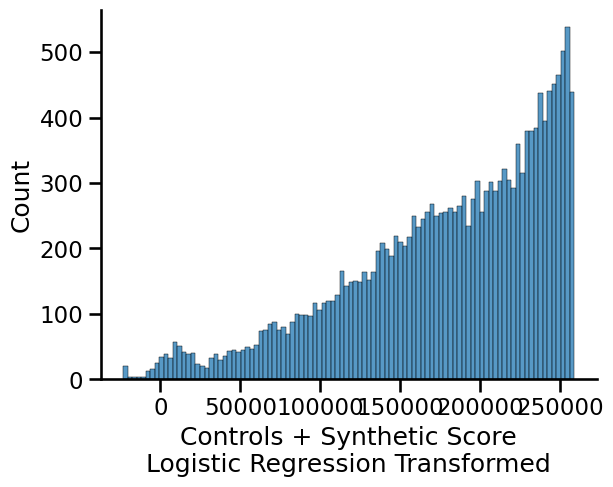

In [129]:
model, r2 = fit_log_reg(gcn4_controls_syn, y="score_gcn4", x="score_controls_syn")
controls_syn["logreg_transform"] = model.predict(np.log(controls_syn[["score"]].rename(columns = {"score" : "score_controls_syn"})))
# controls_syn_threshold = model.predict([[19530]])[0]
# print("New threshold for controls + synthetics:", controls_syn_threshold)
sns.histplot(controls_syn["logreg_transform"], bins = 100)
plt.xlabel("Controls + Synthetic Score\nLogistic Regression Transformed")
sns.despine()

In [116]:
controls_syn

,seq,score,screen,linreg_transform,logreg_transform
0,AAAAAIACELRTDNYFEYPDLSILDALDNDSDETMSLIDE,25075.335066,controls_syn,59386.055919,108481.723263
1,AAAAASDHSDVNDIIELGGLSNRLYDFYSDLEDIENDIAV,42429.450978,controls_syn,79076.381417,142198.679028
2,AAADGASFSDDTDEDLYKYDPWDLPGLSVIKTDDPEWFFF,167550.966119,controls_syn,221041.744125,230244.449907
3,AAADGASFSDDTDEDLYKYDPWELPSKASFGEQEWYFFSP,109426.029848,controls_syn,155092.033951,202932.896020
4,AAADGPDCDTREFCELRDSLLWNESCFLLDDDKRFDVSEN,56143.316707,controls_syn,94636.406566,160152.463161
...,...,...,...,...,...
17265,YYSDDIMLDLGVDLSNFQFDFRYFGLDSPLSPPWNEDDDS,254716.006477,controls_syn,319940.934692,257095.907439
17266,YYSEQSCYLDLDLDLDITFLDFSQFLEQLLQSKNDPLVSE,237618.847801,controls_syn,300542.157990,252641.752738
17267,YYSEQSCYLNFPPLDCVDLVATLSEKFKSFSQLLLDFPIS,46055.201492,controls_syn,83190.230152,147455.225126
17268,YYSEQSCYLNFPPLDMFPALPSDLSGWVESMLSELNNPAS,141711.824042,controls_syn,191724.138972,219507.243009


In [117]:
gcn4

,seq,score,screen
0,MALRIEVYNRIESSTASTALQRQDLRYTFRSNARAASGQA,50849.75654,gcn4
1,EVYNRIESSTASTALQRQDLRYTFRSNARAASGQANANYQ,22153.46439,gcn4
2,IESSTASTALQRQDLRYTFRSNARAASGQANANYQAFTAG,25911.89042,gcn4
3,ASTALQRQDLRYTFRSNARAASGQANANYQAFTAGSALNG,22446.77365,gcn4
4,QRQDLRYTFRSNARAASGQANANYQAFTAGSALNGPSLPA,51501.39821,gcn4
...,...,...,...
20726,AKVDTEEEDKTMVDSTSLSWEDLFDFESYSTDLIASINPD,261829.75160,gcn4
20727,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR,261410.70530,gcn4
20728,MTDSTPMFEYELTENNSKEWTSLFDTDIPVTTDDESLADK,152798.87030,gcn4
20729,STDSTPMFEYQNLENNSKEWTSLFDNDIPVTTDNVSLADK,113197.55830,gcn4


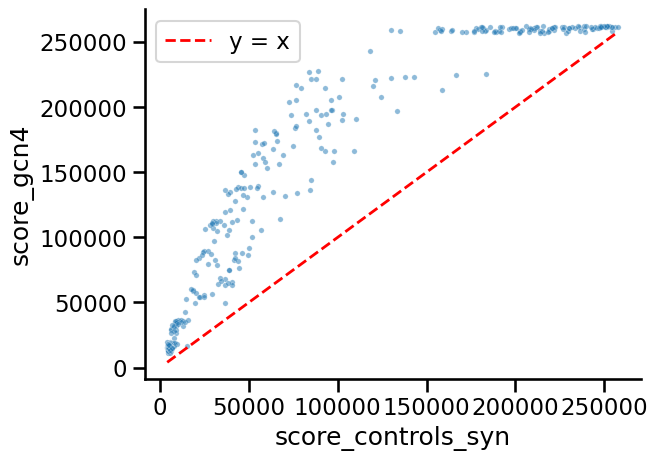

In [118]:
ax = sns.scatterplot(data=gcn4_controls_syn, x="score_controls_syn", y="score_gcn4", s=15, alpha=0.5)
plt.plot([gcn4_controls_syn["score_controls_syn"].min(), gcn4_controls_syn["score_controls_syn"].max()],
         [gcn4_controls_syn["score_controls_syn"].min(), gcn4_controls_syn["score_controls_syn"].max()],
         color='red', linestyle='--', linewidth=2, label='y = x')
plt.legend()

sns.despine()

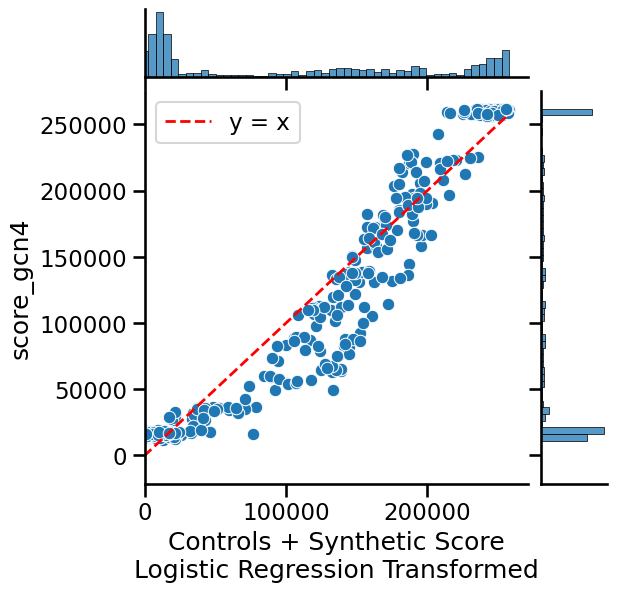

In [138]:
transformed_overlap = pd.merge(controls_syn, gcn4, on = "seq", suffixes = ("_controls_syn", "_gcn4"))
sns.jointplot(data=transformed_overlap, x="logreg_transform", y="score_gcn4", kind="scatter", marginal_kws=dict(bins=50, fill=True))
plt.plot([transformed_overlap["logreg_transform"].min(), transformed_overlap["logreg_transform"].max()],
         [transformed_overlap["logreg_transform"].min(), transformed_overlap["logreg_transform"].max()],
         color='red', linestyle='--', linewidth=2, label='y = x')
plt.xlim(0, None)
plt.legend()
plt.xlabel("Controls + Synthetic Score\nLogistic Regression Transformed")
sns.despine()

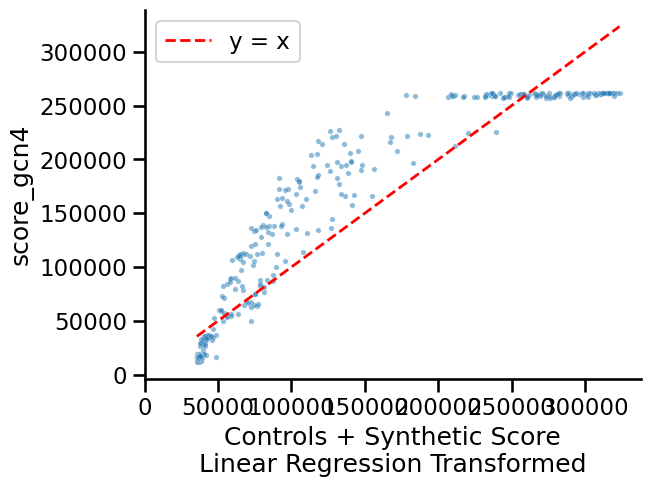

In [132]:
transformed_overlap = pd.merge(controls_syn, gcn4, on = "seq", suffixes = ("_controls_syn", "_gcn4"))
sns.scatterplot(data=transformed_overlap, x="linreg_transform", y="score_gcn4", alpha = 0.5, s = 15)
plt.plot([transformed_overlap["linreg_transform"].min(), transformed_overlap["linreg_transform"].max()],
         [transformed_overlap["linreg_transform"].min(), transformed_overlap["linreg_transform"].max()],
         color='red', linestyle='--', linewidth=2, label='y = x')
plt.xlim(0, None)
plt.legend()
plt.xlabel("Controls + Synthetic Score\nLinear Regression Transformed")
sns.despine()